<a href="https://colab.research.google.com/github/indhu-parimi/Netflix-Sentiment-Analysis/blob/main/netflix_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Importing Libraries and Load Data**



In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
!pip install vaderSentiment # This line installs vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # This imports SentimentIntensityAnalyzer
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

In [26]:
netflix = pd.read_csv("/content/netflix_titles.csv")
netflix

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]

In [27]:
netflix.rename(columns={'description': 'review'}, inplace=True)

In [28]:
netflix.head(5)

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                              review  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

# Exploratory Data Analysis

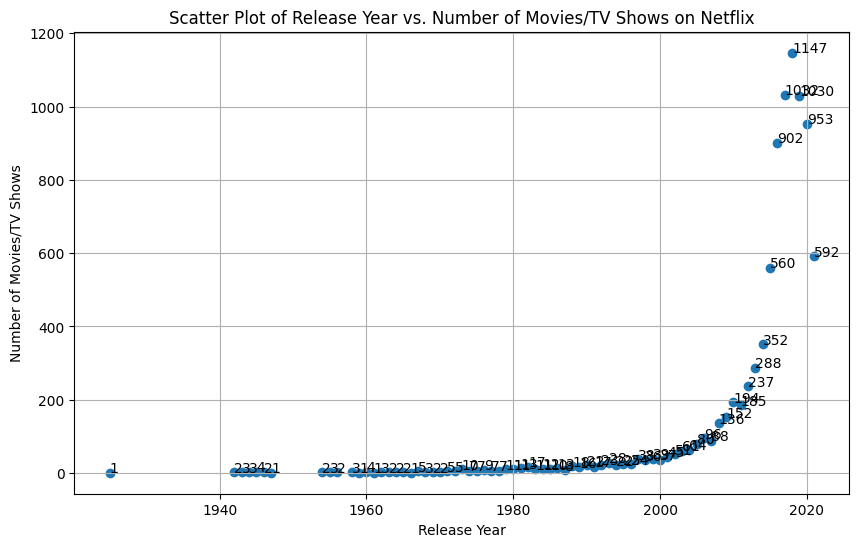

In [29]:
# plotting release_year vs. the count of movies/TV shows
release_year_counts = netflix.groupby('release_year').size()

plt.figure(figsize=(10, 6))
plt.scatter(release_year_counts.index, release_year_counts.values)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies/TV Shows')
plt.title('Scatter Plot of Release Year vs. Number of Movies/TV Shows on Netflix')
plt.grid(True)

# Adding values as text to each point
for i, txt in enumerate(release_year_counts.values):
    plt.annotate(txt, (release_year_counts.index[i], release_year_counts.values[i]))

plt.show()

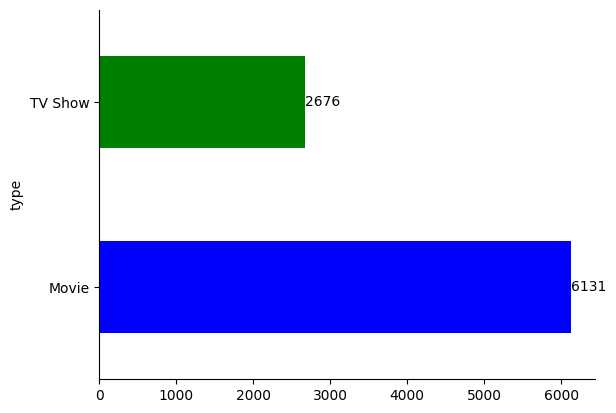

In [30]:
# Creating the horizontal bar plot
ax = netflix.groupby('type').size().plot(kind='barh', color=['blue', 'green'])

# Removing top and right spines
ax.spines[['top', 'right']].set_visible(False)

# Adding the bar values
for p in ax.patches:
    width = p.get_width()  # Get the width of the bar
    ax.text(width + 0.1,       # X position of text (a bit to the right of the bar)
            p.get_y() + p.get_height() / 2, # Y position of text (center of the bar)
            '{:1.0f}'.format(width), # Text to display (formatted as integer)
            ha="left", va="center")  # Text alignment

Word Cloud of various rating movies

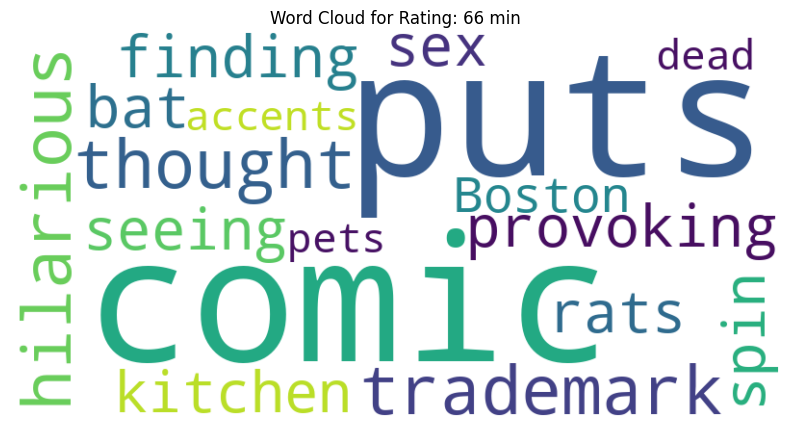

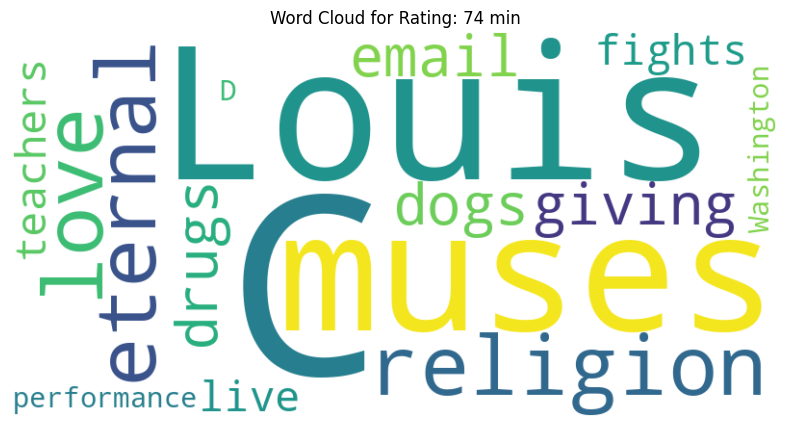

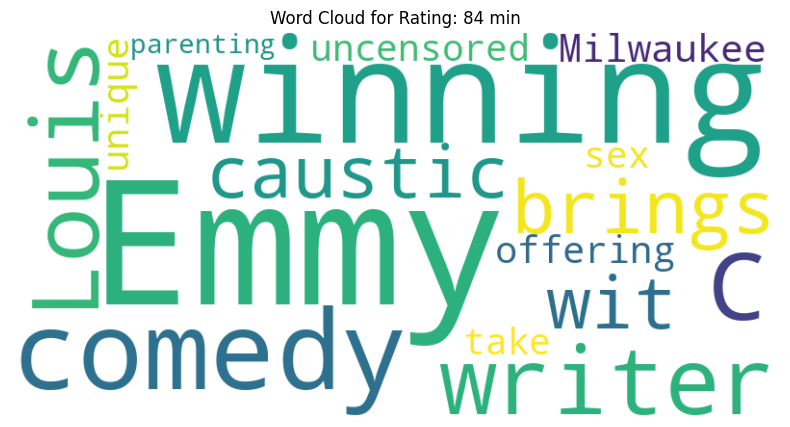

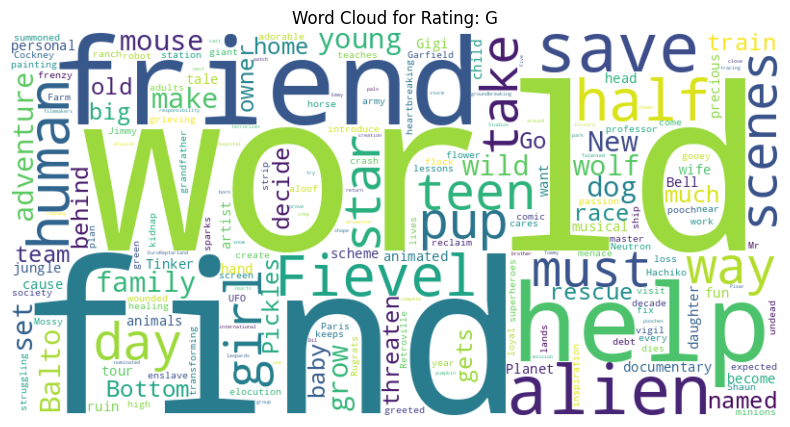

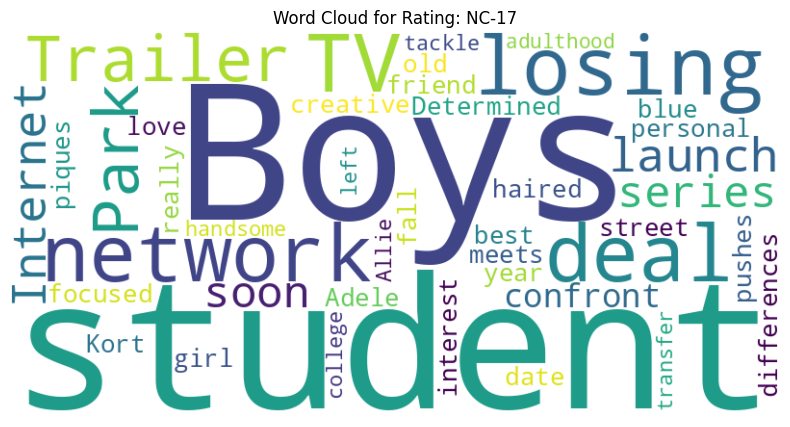

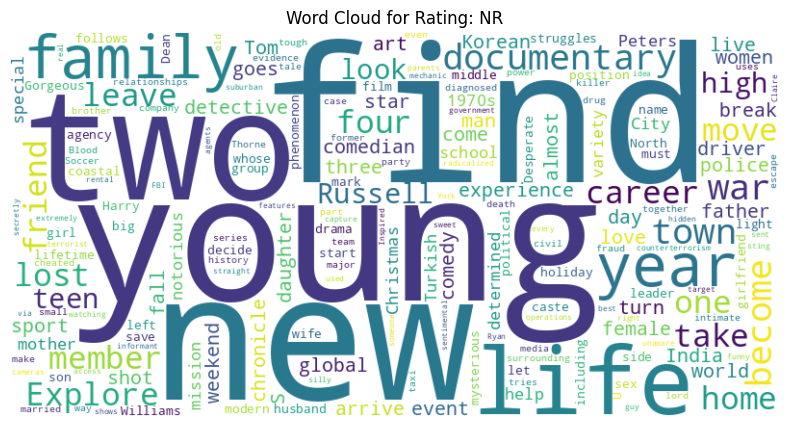

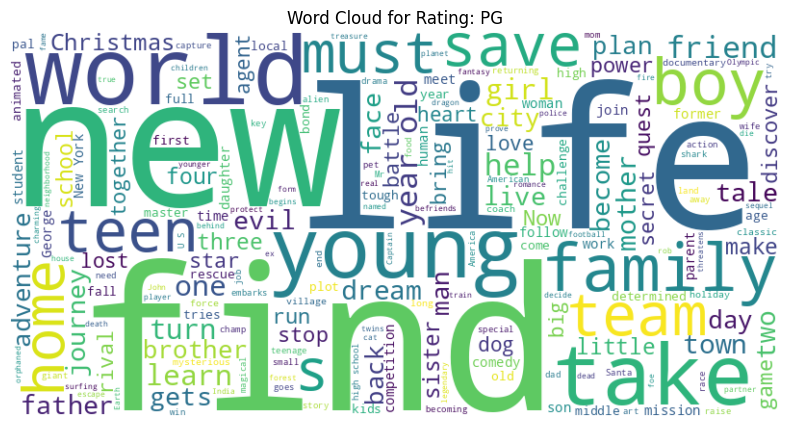

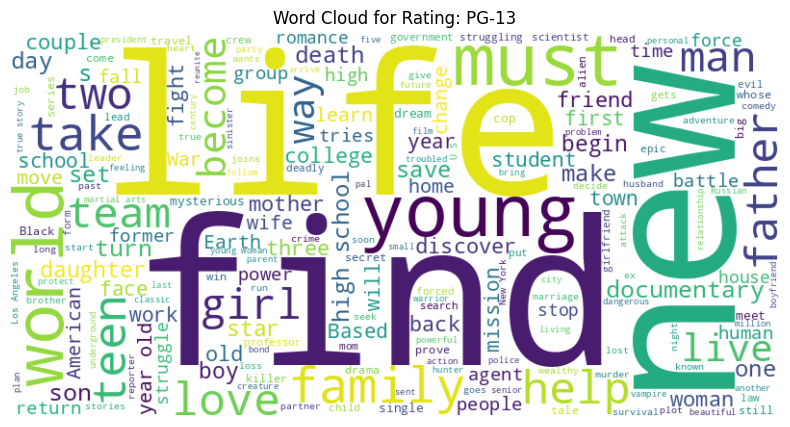

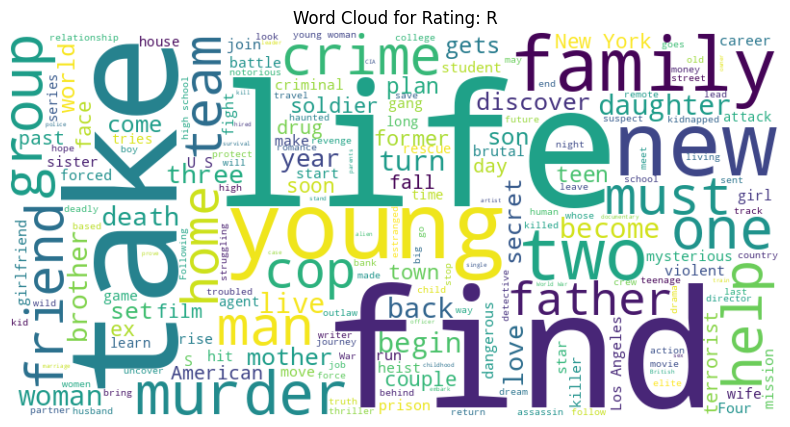

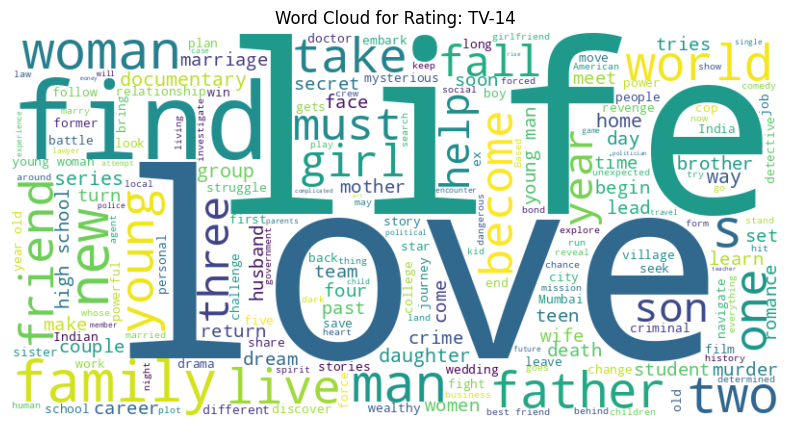

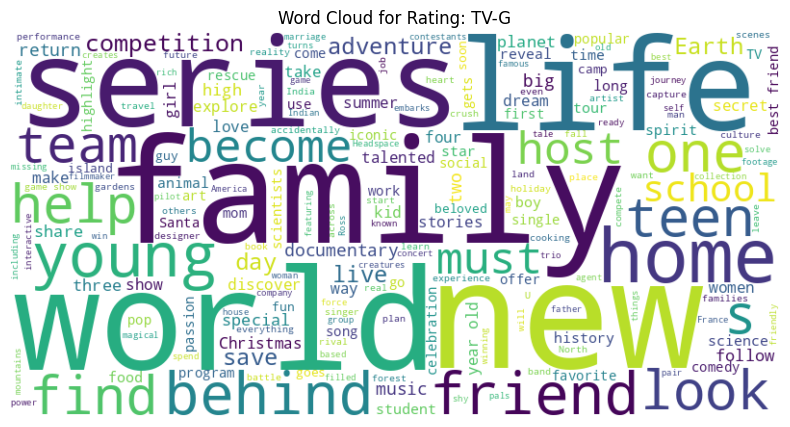

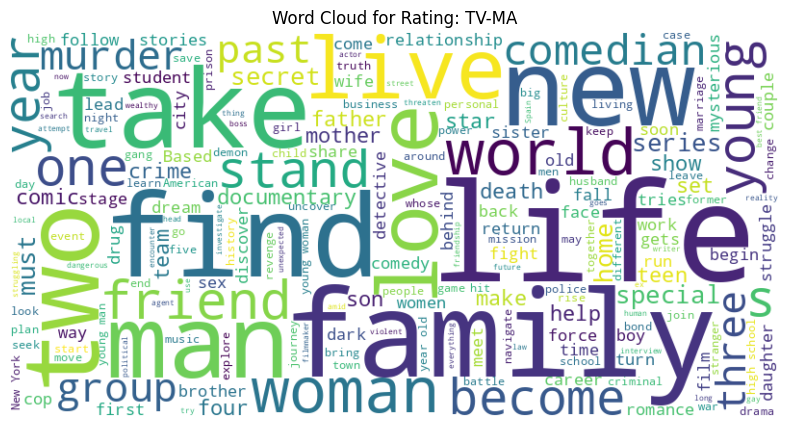

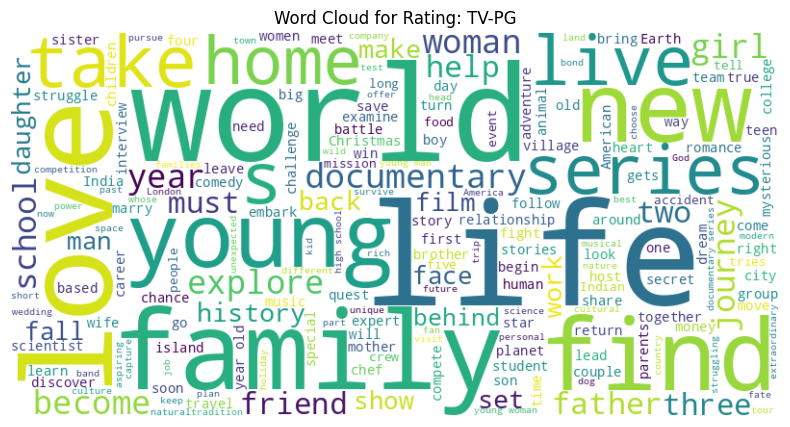

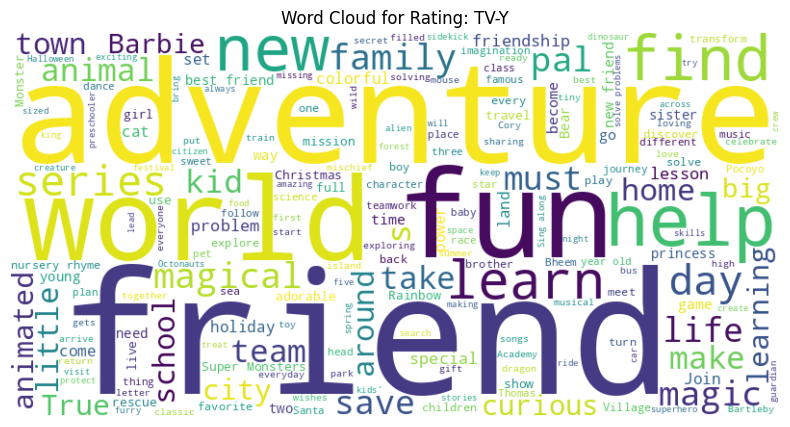

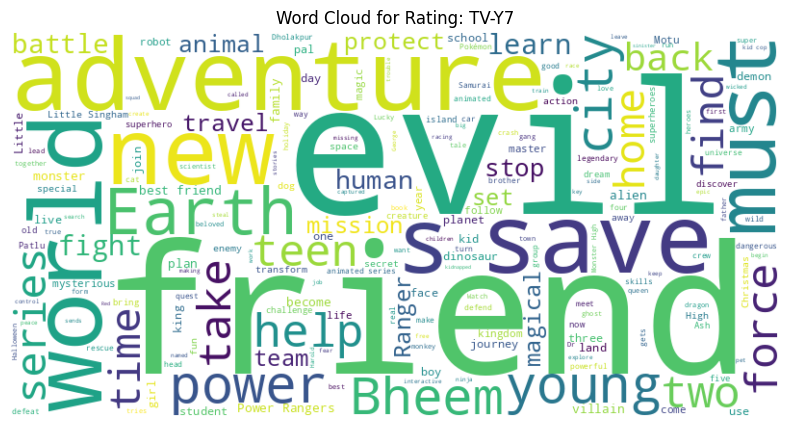

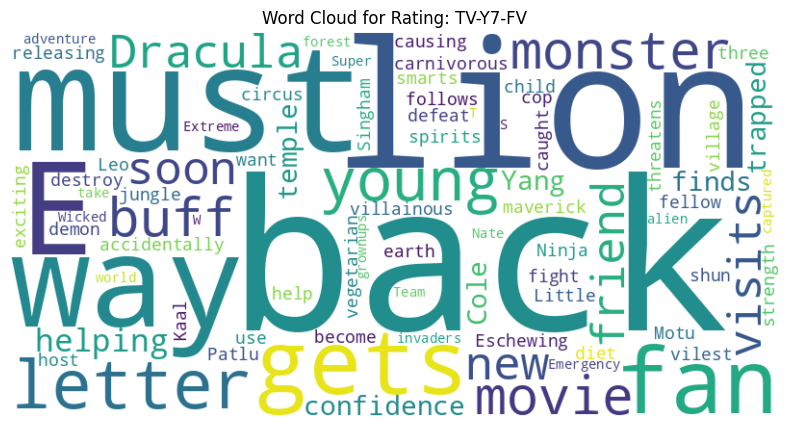

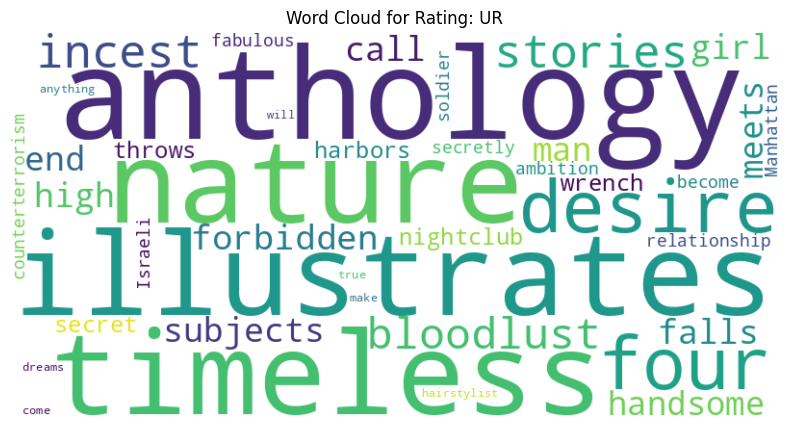

In [31]:
# Grouping the data by rating and concatenate reviews  for each group
rating_reviews = netflix.groupby('rating')['review'].apply(lambda x: ' '.join(x)).reset_index()

# Creating a word cloud for each rating
for index, row in rating_reviews.iterrows():
  rating = row['rating']
  reviews = row['review']

  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews)

  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Word Cloud for Rating: {rating}')
  plt.axis('off')
  plt.show()

# Data Preprocessing

In [32]:
# Checking for null values
print(netflix.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
review             0
dtype: int64


In [33]:
netflix.shape

(8807, 12)

In [34]:
# Dropping rows with any null values in the specified columns
netflix.dropna(subset=['director', 'cast', 'country', 'date_added', 'rating', 'duration'], inplace=True)

# Resetting index after dropping rows
netflix.reset_index(drop=True, inplace=True)

# Verifying that null values have been removed
print(netflix.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
review          0
dtype: int64


In [35]:
# Checking the data types of the columns
print(netflix.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
review          object
dtype: object


In [36]:
# Correcting the data types
netflix['show_id'] = netflix['show_id'].astype(str)  # Should be string
netflix['type'] = netflix['type'].astype(str)  # Should be string
netflix['title'] = netflix['title'].astype(str)  # Should be string
netflix['director'] = netflix['director'].astype(str)  # Should be string
netflix['cast'] = netflix['cast'].astype(str)  # Should be string
netflix['country'] = netflix['country'].astype(str)  # Should be string
netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce')  # Should be datetime
netflix['release_year'] = netflix['release_year'].astype(int)  # Should be integer
netflix['rating'] = netflix['rating'].astype(str)  # Should be string
netflix['duration'] = netflix['duration'].astype(str)  # Should be string
netflix['listed_in'] = netflix['listed_in'].astype(str)  # Should be string
netflix['review'] = netflix['review'].astype(str)  # Should be string

# Verifying the corrected data types
print(netflix.dtypes)

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
review                  object
dtype: object


**Sentiment Analysis Using VADER**

In [37]:
# Initializing VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # Return the compound score

# Applying the function to the review column
netflix['sentiment_score'] = netflix['review'].apply(get_sentiment)

# Categorizing sentiment
netflix['sentiment_category'] = np.where(netflix['sentiment_score'] >= 0.05, 'Positive',
                                              np.where(netflix['sentiment_score'] <= -0.05, 'Negative', 'Neutral'))

# Displaying the sentiment categories
print(netflix[['review', 'sentiment_score', 'sentiment_category']].head())

                                              review  sentiment_score  \
0  On a photo shoot in Ghana, an American model s...          -0.7845   
1  A talented batch of amateur bakers face off in...           0.9382   
2  A woman adjusting to life after a loss contend...          -0.6249   
3  After most of her family is murdered in a terr...          -0.9419   
4  When the father of the man she loves insists t...           0.8176   

  sentiment_category  
0           Negative  
1           Positive  
2           Negative  
3           Negative  
4           Positive  


**Data Visualization**

<ipython-input-38-e1bb6a22cdbd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=netflix, x='sentiment_category', palette='Set2')


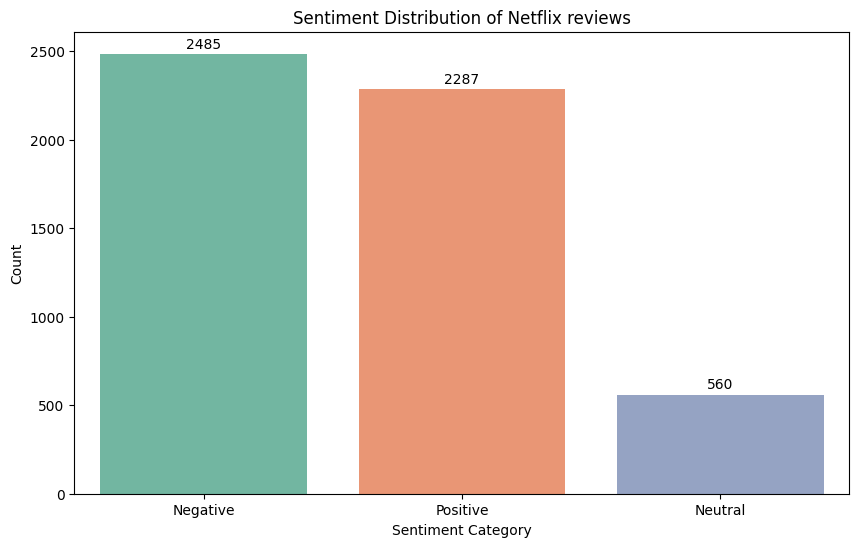

In [38]:
# Visualizing the sentiment distribution with count annotations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=netflix, x='sentiment_category', palette='Set2')
plt.title('Sentiment Distribution of Netflix reviews')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')

# Adding count annotations to the bars with vertical offset
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=2)  # Add padding for vertical offset

plt.show()

# Preparing Data for Machine Learning

In [39]:
# Dropping rows with any null values in the specified columns
netflix.dropna(subset=['review', 'rating', 'type'], inplace=True)

# Initializing TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fitting and transforming the review column
tfidf_matrix = tfidf_vectorizer.fit_transform(netflix['review'])

# Converting the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Combining the TF-IDF DataFrame with other features
X = pd.concat([netflix[['type', 'rating']], tfidf_df], axis=1)

# Converting categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Targeting variable
y = netflix['sentiment_category']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shape of the datasets
print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")


Training data shape: (4265, 14312), Testing data shape: (1067, 14312)


In [40]:
# Converting the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [41]:
# Saving the feature names
feature_names = X.columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')

['feature_names.pkl']

**Model Training and Evaluation**

Random Forest Classification Report:
              precision    recall  f1-score   support

    Negative       0.70      0.81      0.75       523
     Neutral       1.00      0.01      0.02       111
    Positive       0.68      0.72      0.70       433

    accuracy                           0.69      1067
   macro avg       0.79      0.51      0.49      1067
weighted avg       0.72      0.69      0.65      1067



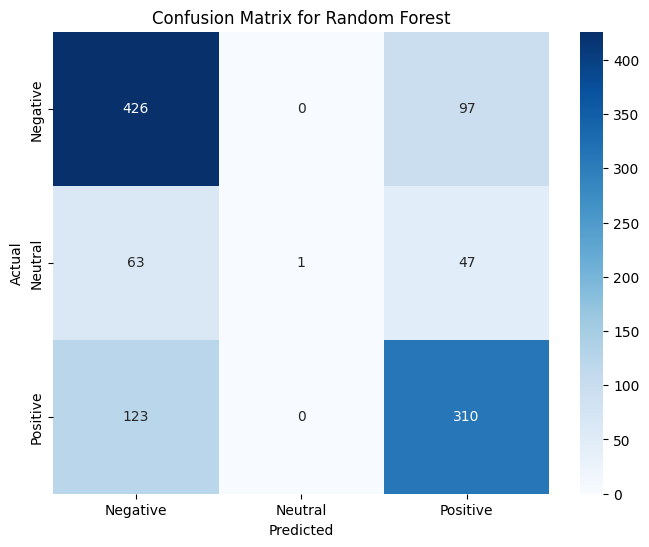

In [42]:
# Training Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions
rf_predictions = rf_model.predict(X_test)

# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Model Training with SVM**

SVM Classification Report:
              precision    recall  f1-score   support

    Negative       0.74      0.82      0.78       523
     Neutral       0.50      0.02      0.03       111
    Positive       0.70      0.78      0.74       433

    accuracy                           0.72      1067
   macro avg       0.65      0.54      0.52      1067
weighted avg       0.70      0.72      0.69      1067



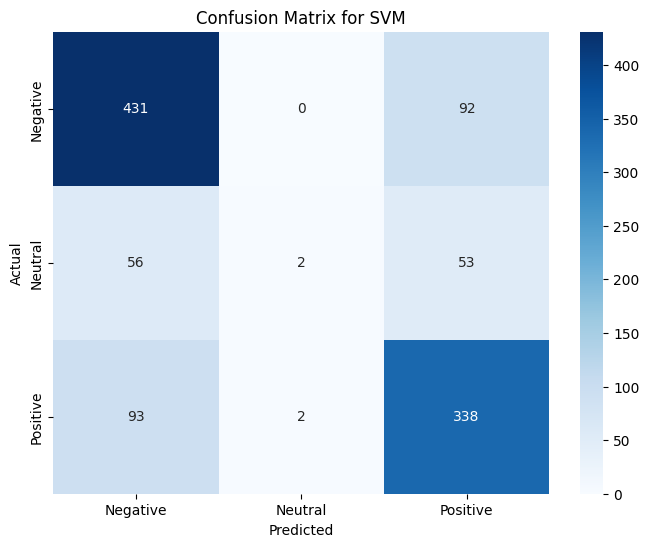

In [44]:
# Training SVM Classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Making predictions
svm_predictions = svm_model.predict(X_test)

# Evaluation
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the model

In [45]:
# Saving the Random Forest model to a file
joblib.dump(rf_model, 'random_forest_model.pkl')

print("Random Forest model saved successfully!")

Random Forest model saved successfully!


# USER Testing

In [46]:
import pandas as pd
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Loading the trained Random Forest model
rf_model = joblib.load('/content/random_forest_model.pkl')

# Loading the TF-IDF Vectorizer used for training
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')  # Ensure you save the vectorizer during training

# Loading the feature names
feature_names = joblib.load('feature_names.pkl')  # Ensure you load feature names

def predict_sentiment(user_type, user_rating, user_review):
    # Creating a DataFrame for the input
    input_data = pd.DataFrame({
        'type': [user_type],
        'rating': [user_rating],  # User-defined rating
        'review': [user_review]
    })

    # Transforming the review using the loaded TF-IDF vectorizer
    tfidf_matrix = tfidf_vectorizer.transform(input_data['review'])

    # Converting the TF-IDF matrix to a DataFrame
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

    # Combining the TF-IDF DataFrame with other features
    combined_input = pd.concat([input_data[['type', 'rating']], tfidf_df], axis=1)

    # Converting categorical variables into dummy/indicator variables
    combined_input = pd.get_dummies(combined_input, drop_first=True)

    for col in feature_names:
        if col not in combined_input.columns:
            combined_input[col] = 0  # Add missing features with value 0

    # Reordering columns to match the training data
    combined_input = combined_input[feature_names]

    # Predicting sentiment category
    prediction = rf_model.predict(combined_input)

    return prediction[0]

# User testing interface
if __name__ == "__main__":
    user_type = input("Enter the type (Movie/TV Show): ")
    user_rating = input("Enter the rating (e.g., PG, PG-13, R, etc.): ")  # User-defined rating
    user_review = input("Enter the review: ")

    predicted_sentiment = predict_sentiment(user_type, user_rating, user_review)
    print(f"The predicted sentiment is: {predicted_sentiment}")

Enter the type (Movie/TV Show): movie
Enter the rating (e.g., PG, PG-13, R, etc.): pg
Enter the review: Children & Family Movies, Comedies	Five disparate kids, snowed in at the airport on Christmas Eve, try to get back to their families and outsmart a disgruntled airport official.									Children & Family Movies, Comedies	Five disparate kids, snowed in at the airport on Christmas Eve, try to get back to their families and outsmart a disgruntled airport official
The predicted sentiment is: Neutral
